<a href="https://colab.research.google.com/github/lg960214/DACON_Seoul_6/blob/feat%2Flhg/Ihk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#테스트

In [2]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 8.3 MB/s 
     |████████████████████████████████| 16.7 MB 299 kB/s 
     |████████████████████████████████| 6.3 MB 16.7 MB/s 


In [3]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
dir_shp = '/content/drive/MyDrive/DACON6/서울시 지리 정보/통계지역경계/집계구.shp'
plt.rcParams['figure.figsize'] = (20, 20)
seoul = gpd.read_file(dir_shp)

In [43]:
dir_subway_eld = '/content/drive/MyDrive/DACON6/지하철 이용 정보/서울교통공사_역별 일별 시간대별 노인 승하차인원 정보_20220531.csv'
df_sub1 = pd.read_csv(dir_subway_eld, encoding='cp949')
date = np.unique(df_sub1['일자'])[-1]
df_sub1 = df_sub1[df_sub1['일자']==date]
df_sub1_ride = df_sub1[df_sub1['구분']=='합계 : 승차']
df_sub1_off = df_sub1[df_sub1['구분']=='합계 : 하차']
df_sub1_ride = df_sub1_ride.iloc[:, 3:].drop(columns=['구분'])

In [44]:
from shapely.geometry import Point
dir_subway_pos = '/content/drive/MyDrive/DACON6/지하철 시설 정보/서울시 역사마스터 정보.csv'
df_sub2 = pd.read_csv(dir_subway_pos, encoding='cp949')
df_sub2['역명'] = df_sub2['역사명']
df_sub2 = df_sub2.drop(columns=['역사명', '호선', '역사_ID'])

df = pd.merge(df_sub1_ride, df_sub2, on='역명')
df = df.groupby(by='역명').mean()
df['역명'] = df.index
df.index = list(range(len(df)))

In [45]:
s = gpd.GeoSeries([Point(x, y) for x, y in zip(df['위도'], df['경도'])])
geodf = gpd.GeoDataFrame(df.iloc[:, :-3], geometry=s)
geodf.crs = 'epsg:4326'
geodf = geodf.to_crs(epsg=5179)

In [46]:
geodf

,06시이전,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,12시-13시,13시-14시,14시-15시,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시이후,geometry
0,33.5,58.0,84.5,116.0,151.5,184.0,203.0,182.5,147.0,192.0,211.0,179.0,144.5,111.0,76.5,58.0,38.0,32.0,9.5,POINT (966238.430 1943770.120)
1,51.0,71.0,58.0,66.0,62.0,111.0,146.0,143.0,172.0,184.0,305.0,326.0,288.0,225.0,127.0,68.0,51.0,32.0,10.0,POINT (945415.473 1942592.875)
2,63.0,146.0,98.0,112.0,204.0,292.0,380.0,349.0,374.0,631.0,751.0,609.0,455.0,273.0,236.0,197.0,124.0,90.0,21.0,POINT (958279.030 1944343.976)
3,14.0,49.0,39.0,54.0,75.0,98.0,119.0,92.0,115.0,150.0,198.0,119.0,140.0,98.0,69.0,71.0,45.0,28.0,9.0,POINT (959456.157 1946547.154)
4,131.0,109.0,155.0,185.0,238.0,260.0,330.0,272.0,205.0,234.0,228.0,388.0,260.0,170.0,117.0,80.0,39.0,26.0,8.0,POINT (967530.428 1948561.971)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,163.0,232.0,262.0,309.0,421.0,407.0,395.0,390.0,326.0,276.0,325.0,341.0,219.0,151.0,114.0,68.0,33.0,21.0,6.0,POINT (950890.044 1954553.036)
231,262.0,234.0,301.0,401.0,396.0,422.0,352.0,356.0,332.0,253.0,285.0,237.0,226.0,143.0,117.0,79.0,39.0,24.0,8.0,POINT (941735.253 1949336.244)
232,67.0,78.0,115.0,136.0,129.0,117.0,99.0,107.0,117.0,91.0,73.0,87.0,56.0,54.0,25.0,23.0,13.0,6.0,0.0,POINT (963349.405 1957927.759)
233,11.0,51.0,53.0,93.0,113.0,225.0,422.0,633.0,791.0,1002.0,1125.0,1087.0,888.0,359.0,154.0,102.0,56.0,27.0,7.0,POINT (953917.971 1951145.953)


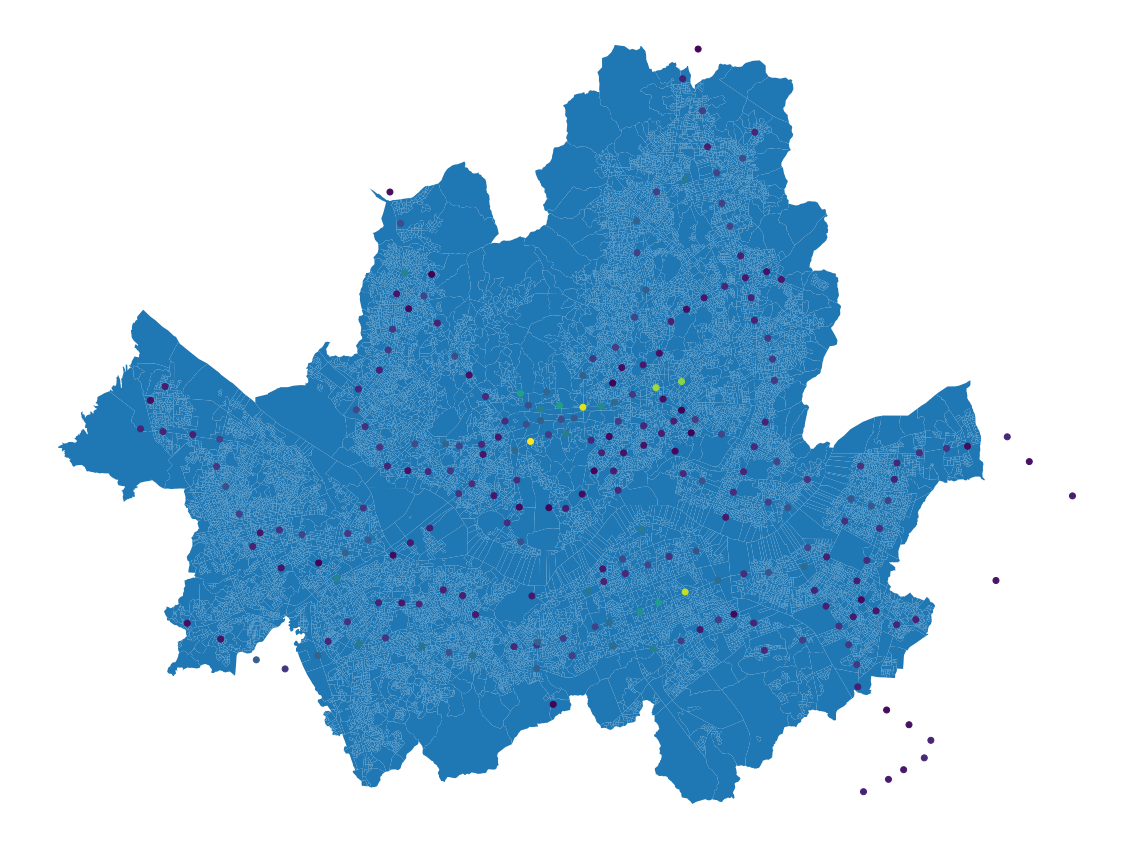

In [53]:
fig, ax = plt.subplots()
ax.axis('off')
seoul.plot(ax=ax)
geodf.plot(column='17시-18시', ax=ax)
plt.show()